# आव्हान: डेटा सायन्सबद्दल मजकूराचे विश्लेषण

> *या नोटबुकमध्ये, आपण मशीन लर्निंगवरील विकिपीडिया लेखाचा वापर करून विविध URL वापरण्याचा प्रयोग करतो. आपण पाहू शकतो की, डेटा सायन्सच्या तुलनेत, या लेखामध्ये अनेक संज्ञा आहेत, ज्यामुळे विश्लेषण अधिक कठीण होते. कीवर्ड एक्स्ट्रॅक्शन केल्यानंतर डेटा साफ करण्याचा दुसरा मार्ग शोधणे आवश्यक आहे, जेणेकरून काही वारंवार, पण अर्थहीन शब्दसमूह काढून टाकता येतील.*

या उदाहरणात, पारंपरिक डेटा सायन्स प्रक्रियेच्या सर्व टप्प्यांचा समावेश असलेला एक साधा व्यायाम करूया. तुम्हाला कोणताही कोड लिहिण्याची गरज नाही, तुम्ही खालील सेल्सवर क्लिक करून त्यांना चालवू शकता आणि परिणाम पाहू शकता. आव्हान म्हणून, तुम्हाला वेगळ्या डेटासह हा कोड वापरून पाहण्याचे प्रोत्साहन दिले जाते.

## उद्दिष्ट

या धड्यात, आपण डेटा सायन्सशी संबंधित विविध संकल्पनांवर चर्चा केली आहे. **टेक्स्ट मायनिंग** करून अधिक संबंधित संकल्पना शोधण्याचा प्रयत्न करूया. आपण डेटा सायन्सबद्दल मजकूर घेऊन सुरुवात करू, त्यातून कीवर्ड्स काढू आणि नंतर परिणामाचे व्हिज्युअलायझेशन करण्याचा प्रयत्न करू.

मजकूर म्हणून, मी विकिपीडियावरील डेटा सायन्स पृष्ठाचा वापर करणार आहे:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## चरण 1: डेटा मिळवणे

प्रत्येक डेटा सायन्स प्रक्रियेतील पहिलं पाऊल म्हणजे डेटा मिळवणे. यासाठी आपण `requests` लायब्ररीचा वापर करू:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## चरण 2: डेटाचे रूपांतर करणे

पुढील चरण म्हणजे डेटाला प्रक्रिया करण्यासाठी योग्य स्वरूपात रूपांतरित करणे. आपल्या बाबतीत, आपण पृष्ठावरून HTML स्रोत कोड डाउनलोड केला आहे आणि आता तो साध्या मजकुरात रूपांतरित करणे आवश्यक आहे.

हे करण्याचे अनेक मार्ग आहेत. आपण Python मधील सर्वात सोपा अंगभूत [HTMLParser](https://docs.python.org/3/library/html.parser.html) ऑब्जेक्ट वापरणार आहोत. यासाठी आपल्याला `HTMLParser` वर्गाचे सबक्लासिंग करावे लागेल आणि HTML टॅग्समधील सर्व मजकूर गोळा करणारा कोड परिभाषित करावा लागेल, परंतु `<script>` आणि `<style>` टॅग्स वगळून.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## चरण ३: माहिती मिळवणे

आपल्या डेटामधून उपयुक्त माहिती काढणे हा सर्वात महत्त्वाचा टप्पा आहे. आपल्या बाबतीत, आपल्याला मजकुरातून कीवर्ड्स काढायचे आहेत आणि कोणते कीवर्ड्स अधिक महत्त्वाचे आहेत हे पाहायचे आहे.

कीवर्ड्स काढण्यासाठी आपण [RAKE](https://github.com/aneesha/RAKE) नावाची Python लायब्ररी वापरणार आहोत. प्रथम, ही लायब्ररी नसल्यास ती इन्स्टॉल करूया:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


मुख्य कार्यक्षमता `Rake` ऑब्जेक्टमधून उपलब्ध आहे, ज्याला काही पॅरामीटर्स वापरून सानुकूलित करता येते. आमच्या बाबतीत, आम्ही कीवर्डची किमान लांबी 5 अक्षरे, दस्तऐवजात कीवर्डची किमान वारंवारता 3 आणि कीवर्डमधील शब्दांची कमाल संख्या - 2 सेट करू. इतर मूल्यांसह प्रयोग करण्यास आणि परिणाम पाहण्यास मोकळ्या मनाने प्रयत्न करा.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

आम्हाला महत्त्वाच्या अंशांसह संलग्न असलेल्या संज्ञांची यादी मिळाली. जसे तुम्ही पाहू शकता, यादीच्या शीर्षस्थानी मशीन लर्निंग आणि बिग डेटा यांसारख्या सर्वात संबंधित शाखा आहेत.

## चरण ४: निकालाचे दृश्यरूपात सादरीकरण

लोक डेटा दृश्य स्वरूपात सर्वात चांगल्या प्रकारे समजून घेऊ शकतात. त्यामुळे डेटा दृश्यरूपात सादर करणे आणि काही अंतर्दृष्टी मिळवणे अनेकदा उपयुक्त ठरते. आपण Python मधील `matplotlib` लायब्ररीचा वापर करून कीवर्ड्सच्या महत्त्वासह साधी वितरण रचना तयार करू शकतो:


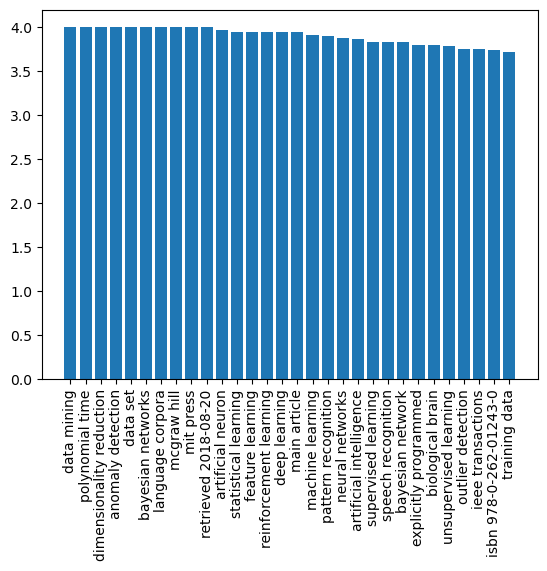

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

तथापि, शब्दांच्या वारंवारतेचे दृश्यीकरण करण्याचा आणखी चांगला मार्ग आहे - **शब्द मेघ** वापरणे. आपल्या कीवर्ड यादीतून शब्द मेघ तयार करण्यासाठी आपल्याला आणखी एक लायब्ररी स्थापित करावी लागेल.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` ऑब्जेक्ट मूळ मजकूर किंवा पूर्व-गणना केलेल्या शब्दांची त्याच्या वारंवारतेसह यादी घेण्यासाठी जबाबदार आहे आणि प्रतिमा परत करते, जी नंतर `matplotlib` वापरून प्रदर्शित केली जाऊ शकते:


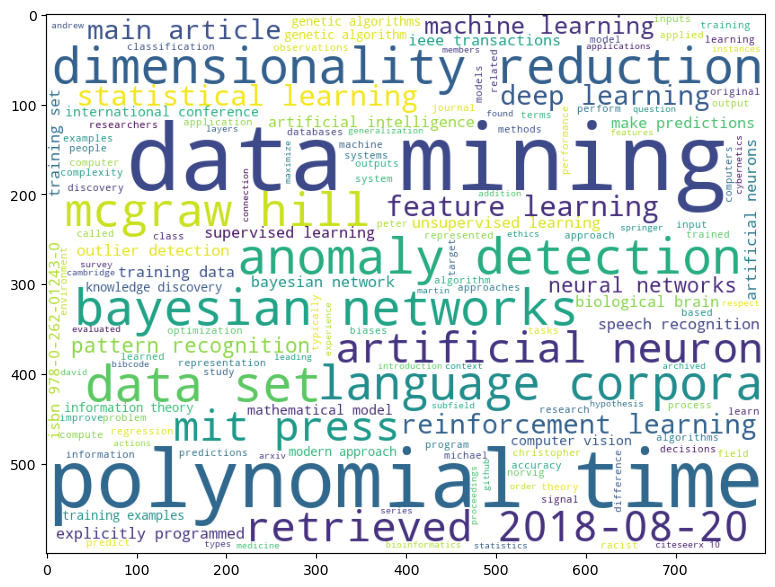

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

आम्ही मूळ मजकूर `WordCloud` ला देखील पास करू शकतो - पाहूया आपण समान परिणाम मिळवू शकतो का:


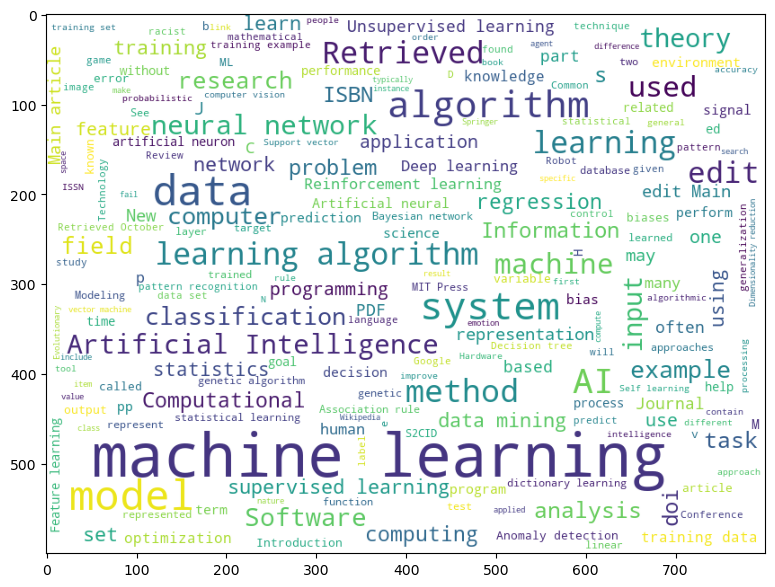

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

आपण पाहू शकता की शब्द मेघ आता अधिक प्रभावी दिसतो, परंतु त्यात बरेच अनावश्यक शब्द (उदा. `Retrieved on` सारखे असंबंधित शब्द) देखील आहेत. तसेच, आपल्याला दोन शब्दांपासून बनलेले कमी कीवर्ड मिळतात, जसे की *data scientist* किंवा *computer science*. याचे कारण म्हणजे RAKE अल्गोरिदम मजकुरातून चांगले कीवर्ड निवडण्यात अधिक चांगले कार्य करते. हा उदाहरण डेटा पूर्व-प्रक्रिया आणि स्वच्छतेचे महत्त्व स्पष्ट करते, कारण शेवटी स्पष्ट चित्र आपल्याला चांगले निर्णय घेण्यास मदत करेल.

या व्यायामात आपण Wikipedia मजकुरातून काही अर्थ काढण्याची एक साधी प्रक्रिया पाहिली, कीवर्ड आणि शब्द मेघाच्या स्वरूपात. हे उदाहरण खूप सोपे आहे, परंतु डेटा सायंटिस्ट डेटा सोबत काम करताना घेतलेल्या सर्व सामान्य टप्प्यांचे चांगले प्रदर्शन करते, डेटा मिळवण्यापासून ते व्हिज्युअलायझेशनपर्यंत.

आमच्या कोर्समध्ये आपण या सर्व टप्प्यांवर सविस्तर चर्चा करू.



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील मूळ दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी, व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवणाऱ्या कोणत्याही गैरसमजांकरिता किंवा चुकीच्या अर्थ लावण्याकरिता आम्ही जबाबदार राहणार नाही.
